# PREPROCESS

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
path='/content/drive/Shareddrives/gaucher-disease-tani-v1/gaucher hastalar  exell son haliiii.xlsx'

In [ ]:
data = pd.read_excel(path, skipfooter = 33)

In [ ]:
data.tail(50)

,dosya no,Unnamed: 1,dt,yaşı,moleküler,enzim,ilk semt yaşı,ilk semptom,akrabalık,ilk tanısı,asit fosfataz,kitotrdaz,tanısı,ilk hb düzeyi,ilk tromb düz,ilk lök düz,ilk kc büy,ilk dalak büy,ilk kmd z,ilk ert,doz,2. doz,doz degisim,son hb düz,son tromb düz,son lök düz,son dalak büy,son kc büy,son kmd z,enz arası,aile hikayesi,ek bulgu,ted 2. yıl hb,ted 2. yıl plt
0,1148,e,2007-09-20,6 yaş 7 ay,NaN,2.87,NaN,hsm,var,NaN,NaN,NaN,g 1,9.7,185000.0,5100.0,115_4cm,122_4cm,NaN,2009-01-01 00:00:00,60u/kg/doz,30u/kg/doz,2013-10-31,11.7,245000.0,8300.0,87_2cm,105_2cm,"_1,9",6_12.2009,yok,strabismus,NaN,NaN
1,141,k,2000-08-11,NaN,NaN,0.27,6 ay,"nöbet, tonus artışı, kc ve dalak 2cm, baş tutm...",NaN,kemik iliği,993mmol/l/sa,NaN,g 2,10.1,363000.0,15800.0,2cm,2cm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,var,nöbet,NaN,NaN
2,126,e,1994-04-20,NaN,NaN,NaN,2 ay,"hsm, kilo alamama",yok,kc bx-kemik bx,NaN,NaN,g3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yok,NaN,NaN,NaN
3,989,k,2003-01-13,13 yaş 2 ay,L444P/L444P,0.2,2 yaş,"karın şişliği,hsm, büyüme geriliği",var,kemik iliği köpük hücresi,NaN,7782 <40,g 3,8.1,61000.0,3700.0,157_15cm,170_inguinal,"_3,9",2006,60u/kg/doz,30u/kg/doz,2013-10-21,11.6,94000.0,4100.0,131_4cm,112_2cm,"_1,8",6.2008_3.2010,yok,geç nm gelişim,11.2,47000.0
4,1261,k,2006-05-01,9 yaş 9 ay,c1226A>G/C1495G>A,0.26,"1,5 yaş","karın şişliği, hsm, vücutta morluklar",yok,kemik iliği,NaN,4070,g1,11.2,59000.0,5700.0,135,12cm-170,"_0,3",subat 2011,60u/kg/doz,30u/kg/doz,2012-09-25,14.2,225000.0,6000.0,115-1cm,110cm-1cm,"_0,1",NaN,yok,NaN,14.4,188000.0
5,1042,k,2006-02-09,10 yaş 1 ay,c1448T^C homozigot,0.4,6 ay,karın şişliği,var,kemik iliği,NaN,1360,g 3,7.8,122000.0,4700.0,3cm-92,inguinal-158,"_2,2",2007-05-01 00:00:00,60u/kg/doz,30u/kg/doz,2013-03-21,10.0,146000.0,5360.0,173_7cm,132_2cm,"_2,8",6.2010_4.2011,var,"strabismus, nefrolitiyazis, kc ve dalakta enfa...",NaN,NaN
6,1061,k,2002-06-03,12 yaş,NaN,0.77,NaN,NaN,NaN,NaN,NaN,NaN,g 1 g3,8.8,91000.0,3500.0,4cm,10cm,NaN,eylul 2007,60u/kg/doz,NaN,NaT,11.8,155000.0,5100.0,190,112,NaN,12.2007_4.2010,yok,düzensiz takip,NaN,NaN
7,584,k,1959-08-10,NaN,NaN,0.44,37 yaş,"pansitopeni, asplenomegali",yok,kemik iliği,NaN,7540,g1,7.0,83000.0,3700.0,3cm,15cm,osteopeni,enz almadı,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,takipsiz,NaN,NaN
8,149,e,1995-03-03,NaN,yok,yok,2 yaş,hsm,NaN,NaN,NaN,NaN,g 1,10.8,253000.0,8400.0,95_3cm,88_2cm,NaN,enz almadı,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,var,takipsiz,NaN,NaN
9,149,e,1988-07-23,NaN,NaN,0.37,NaN,hsm,NaN,NaN,NaN,NaN,g 1,NaN,NaN,NaN,NaN,NaN,NaN,1994-03-01 00:00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,var,cerr paşa takip?,NaN,NaN


In [ ]:
data.head()

,dosya no,Unnamed: 1,dt,yaşı,moleküler,enzim,ilk semt yaşı,ilk semptom,akrabalık,ilk tanısı,asit fosfataz,kitotrdaz,tanısı,ilk hb düzeyi,ilk tromb düz,ilk lök düz,ilk kc büy,ilk dalak büy,ilk kmd z,ilk ert,doz,2. doz,doz degisim,son hb düz,son tromb düz,son lök düz,son dalak büy,son kc büy,son kmd z,enz arası,aile hikayesi,ek bulgu,ted 2. yıl hb,ted 2. yıl plt
0,1148,e,2007-09-20,6 yaş 7 ay,NaN,2.87,NaN,hsm,var,NaN,NaN,NaN,g 1,9.7,185000.0,5100.0,115_4cm,122_4cm,NaN,2009-01-01 00:00:00,60u/kg/doz,30u/kg/doz,2013-10-31,11.7,245000.0,8300.0,87_2cm,105_2cm,"_1,9",6_12.2009,yok,strabismus,NaN,NaN
1,141,k,2000-08-11,NaN,NaN,0.27,6 ay,"nöbet, tonus artışı, kc ve dalak 2cm, baş tutm...",NaN,kemik iliği,993mmol/l/sa,NaN,g 2,10.1,363000.0,15800.0,2cm,2cm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,var,nöbet,NaN,NaN
2,126,e,1994-04-20,NaN,NaN,NaN,2 ay,"hsm, kilo alamama",yok,kc bx-kemik bx,NaN,NaN,g3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yok,NaN,NaN,NaN
3,989,k,2003-01-13,13 yaş 2 ay,L444P/L444P,0.2,2 yaş,"karın şişliği,hsm, büyüme geriliği",var,kemik iliği köpük hücresi,NaN,7782 <40,g 3,8.1,61000.0,3700.0,157_15cm,170_inguinal,"_3,9",2006,60u/kg/doz,30u/kg/doz,2013-10-21,11.6,94000.0,4100.0,131_4cm,112_2cm,"_1,8",6.2008_3.2010,yok,geç nm gelişim,11.2,47000.0
4,1261,k,2006-05-01,9 yaş 9 ay,c1226A>G/C1495G>A,0.26,"1,5 yaş","karın şişliği, hsm, vücutta morluklar",yok,kemik iliği,NaN,4070,g1,11.2,59000.0,5700.0,135,12cm-170,"_0,3",subat 2011,60u/kg/doz,30u/kg/doz,2012-09-25,14.2,225000.0,6000.0,115-1cm,110cm-1cm,"_0,1",NaN,yok,NaN,14.4,188000.0


In [ ]:
data.shape

(45, 34)

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})

In [ ]:
missing_value_data

,percent_missing
dosya no,4.444444
Unnamed: 1,0.000000
dt,8.888889
yaşı,48.888889
moleküler,48.888889
enzim,26.666667
ilk semt yaşı,28.888889
ilk semptom,15.555556
akrabalık,20.000000
ilk tanısı,37.777778


In [ ]:
less_than_50 =  missing_value_data[missing_value_data['percent_missing'] < 50]

In [ ]:
columns = less_than_50.index

In [ ]:
columns

Index(['dosya no', 'Unnamed: 1', 'dt', 'yaşı', 'moleküler', 'enzim',
       'ilk semt yaşı', 'ilk semptom', 'akrabalık', 'ilk tanısı', 'tanısı',
       'ilk hb düzeyi', 'ilk tromb düz', 'ilk lök düz', 'ilk kc büy',
       'ilk dalak büy', 'ilk ert', 'ek bulgu'],
      dtype='object')

In [ ]:
columns_list = columns.to_list()

In [ ]:
len(columns_list)

18

In [ ]:
data_selected = data[columns_list]

In [ ]:
data.shape

(45, 34)

In [ ]:
data_selected.shape

(45, 18)

In [ ]:
(int(data_selected['yaşı'][0].split(' ')[0]) * 12) + int(data_selected['yaşı'][0].split(' ')[2])

79

In [ ]:
data_selected['yaşı'][0]

'6 yaş 7 ay'

In [ ]:
data_selected.dtypes

dosya no                 object
Unnamed: 1               object
dt               datetime64[ns]
yaşı                     object
moleküler                object
enzim                    object
ilk semt yaşı            object
ilk semptom              object
akrabalık                object
ilk tanısı               object
tanısı                   object
ilk hb düzeyi           float64
ilk tromb düz           float64
ilk lök düz             float64
ilk kc büy               object
ilk dalak büy            object
ilk ert                  object
ek bulgu                 object
dtype: object

### Yaşı


In [ ]:
data_selected['yaşı'].fillna('50000', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected['yaşı'][32] = data_selected['yaşı'][32].replace('ex', '50000')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['yaşı']

0      6 yaş 7 ay
1           50000
2           50000
3     13 yaş 2 ay
4      9 yaş 9 ay
5     10 yaş 1 ay
6          12 yaş
7           50000
8           50000
9           50000
10          50000
11          50000
12          50000
13    11 yaş 6 ay
14          50000
15    14 yaş 6 ay
16           9 ay
17     6 yaş 2 ay
18          50000
19          50000
20          50000
21          50000
22          50000
23          50000
24          50000
25    11 yaş 3 ay
26     6 yaş 9 ay
27    11 yaş 5 ay
28     2 yaş 2 ay
29          50000
30    19 yaş 9 ay
31     1 yaş 4 ay
32          50000
33          3 yaş
34          50000
35     3 yaş 4 ay
36           5 ay
37     2 yaş 3 ay
38           9 ay
39          50000
40          50000
41          2 yaş
42         18 yaş
43          50000
44          50000
Name: yaşı, dtype: object

In [ ]:
data_selected['yaşı'] = data_selected['yaşı'].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(data_selected['yaşı'])):
  if data_selected['yaşı'][i] != '50000':
    if 'yaş' in data_selected['yaşı'][i] and 'ay' not in data_selected['yaşı'][i]:
      data_selected['yaşı'][i] = int(data_selected['yaşı'][i].split(' ')[0]) * 12
    elif 'yaş' not in data_selected['yaşı'][i] and 'ay' in data_selected['yaşı'][i]:
      data_selected['yaşı'][i] = int(data_selected['yaşı'][i].split(' ')[0])
    elif 'yaş' in data_selected['yaşı'][i] and 'ay' in data_selected['yaşı'][i]:
      data_selected['yaşı'][i] = (int(data_selected['yaşı'][i].split(' ')[0]) * 12) + int(data_selected['yaşı'][i].split(' ')[2])
    else:
      data_selected['yaşı'][i] = '50000'
  elif data_selected['yaşı'][i] == '50000':
    data_selected['yaşı'][i] = '50000'
  else:
    data_selected['yaşı'][i] = '50000'  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykerne

In [ ]:
data_selected.rename(columns = {'yaşı':'Yaşı (Ay)'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### İlk Semptom


In [ ]:
data_selected['ilk semptom']

0                                                   hsm
1     nöbet, tonus artışı, kc ve dalak 2cm, baş tutm...
2                                     hsm, kilo alamama
3                    karın şişliği,hsm, büyüme geriliği
4                 karın şişliği, hsm, vücutta morluklar
5                                         karın şişliği
6                                                   NaN
7                            pansitopeni, asplenomegali
8                                                   hsm
9                                                   hsm
10                                             bgg, hsm
11                              solukluk, hsm,hipotoni 
12                           sağ kasıkta, dizde şişlik,
13                                                  hsm
14                                                  NaN
15                         hsm, halsizlik, boy kısalığı
16                                   karın şişliği, hsm
17                                              

In [ ]:
data_selected['ilk semptom'].isna().sum()

7

In [ ]:
data_selected['ilk semptom'].fillna('Semptom belirtilmemiş', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
list_of_semptoms = data_selected['ilk semptom'].tolist()

In [ ]:
len(list_of_semptoms)

45

In [ ]:
list_of_semptoms

['hsm',
 'nöbet, tonus artışı, kc ve dalak 2cm, baş tutma yok, nşstagmus',
 'hsm, kilo alamama',
 'karın şişliği,hsm, büyüme geriliği',
 'karın şişliği, hsm, vücutta morluklar',
 'karın şişliği',
 'Semptom belirtilmemiş',
 'pansitopeni, asplenomegali',
 'hsm',
 'hsm',
 'bgg, hsm',
 'solukluk, hsm,hipotoni ',
 'sağ kasıkta, dizde şişlik,',
 'hsm',
 'Semptom belirtilmemiş',
 'hsm, halsizlik, boy kısalığı',
 'karın şişliği, hsm',
 'sm',
 'karın şişliği, hsm, tx',
 'Semptom belirtilmemiş',
 'splenomegali, anemi',
 'Semptom belirtilmemiş',
 'splenomegali',
 'karın şişliği,hsm',
 'hsm',
 'splenomegali, batın şiş, erlanmayer deformitesi',
 'solukluk, hsm',
 'hsm',
 'Semptom belirtilmemiş',
 'hsm',
 'bacak ağrısı, karın şişliği',
 'kilo kaybı, hsm,strabismus',
 'göz teması kaybolmuş, şaşılık, ellerde ve kollarda kasılma, nöbet, bgg, hiperton,hsm',
 'karın şişliği, sm, bisitopeni, nmr, tx öyküsü',
 'karın şişliği, solukluk, tx',
 'karın şişliği, büyüme geriliği,sm',
 'kardeş tanılı',
 'kardeş t

In [ ]:
def flatten(x):
    if type(x) is str:
        for i in x.split(','):
            yield i.strip()
        return 
    try:
        for i in x:
            yield from flatten(i)
    except TypeError:
        yield x 

In [ ]:
flattened_list = list(flatten(list_of_semptoms))

In [ ]:
semptom_dict = {i:flattened_list.count(i) for i in flattened_list}

In [ ]:
semptom_df = pd.DataFrame.from_dict(semptom_dict,orient='index').sort_values(0, ascending=False)

In [ ]:
semptom_df[semptom_df[0] > 1]

,0
hsm,21
karın şişliği,12
Semptom belirtilmemiş,7
sm,3
solukluk,3
splenomegali,3
kardeş tanılı,3
büyüme geriliği,2
tx,2
nöbet,2


In [ ]:
colors = plt.set_cmap('Blues')

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


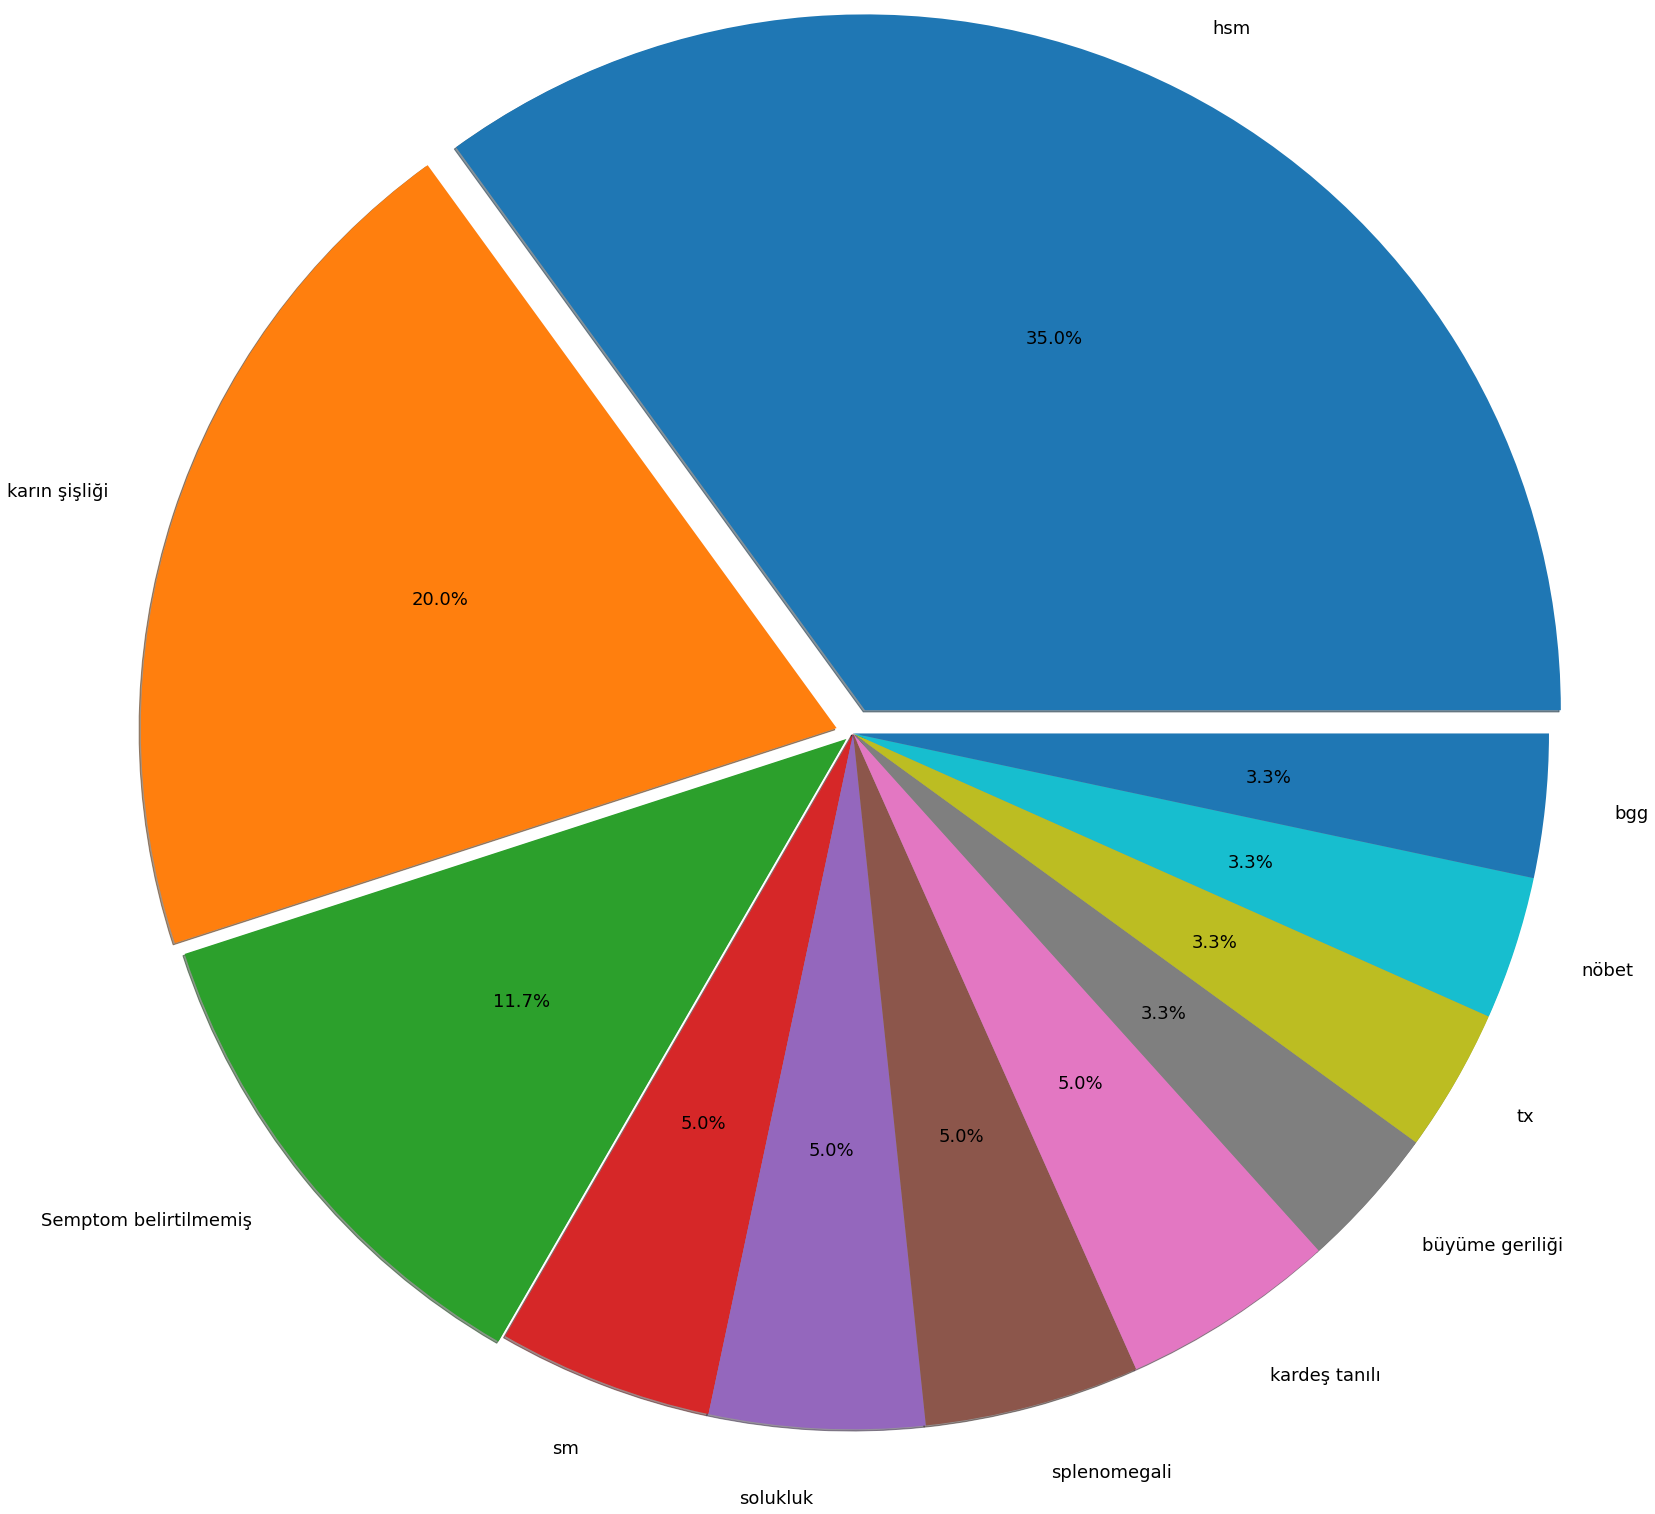

In [ ]:
import matplotlib.pyplot as plt
explode = (0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(semptom_df[semptom_df[0] > 1], 
        shadow=True,
        labels=semptom_df[semptom_df[0] > 1].index,
        radius=8,
        autopct='%1.1f%%',
        textprops={'fontsize': 18},
        explode=explode)
plt.show()

### İlk KC Büyüklüğü


In [ ]:
data_selected['ilk kc büy']

0      115_4cm
1          2cm
2          NaN
3     157_15cm
4          135
5       3cm-92
6          4cm
7          3cm
8       95_3cm
9          NaN
10     152_7cm
11      99_5cm
12       185mm
13     120_3cm
14        6 cm
15    inguinal
16     130_4cm
17         108
18     111_5cm
19      80_5cm
20     103_4cm
21        20cm
22         NaN
23     122_3cm
24      115_12
25     150-7cm
26     108_6cm
27     133-4cm
28      normal
29      5-6 cm
30     155-4cm
31       107cm
32         NaN
33         NaN
34         7cm
35           4
36         2cm
37         yok
38        1 cm
39         NaN
40         4cm
41         7cm
42      130 mm
43         NaN
44        1 cm
Name: ilk kc büy, dtype: object

In [ ]:
data_selected['ilk kc büy'].replace('_|-', '.', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected['ilk kc büy'] = data_selected['ilk kc büy'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for index, item in enumerate(data_selected['ilk kc büy']):
  print(index, item)

0 115.4cm
1 2cm
2 nan
3 157.15cm
4 135
5 3cm.92
6 4cm
7 3cm
8 95.3cm
9 nan
10 152.7cm
11 99.5cm
12 185mm
13 120.3cm
14 6 cm
15 inguinal
16 130.4cm
17 108
18 111.5cm
19 80.5cm
20 103.4cm
21 20cm
22 nan
23 122.3cm
24 115.12
25 150.7cm
26 108.6cm
27 133.4cm
28 normal
29 5.6 cm
30 155.4cm
31 107cm
32 nan
33 nan
34 7cm
35 4
36 2cm
37 yok
38 1 cm
39 nan
40 4cm
41 7cm
42 130 mm
43 nan
44 1 cm


In [ ]:
mm_kc_index = []
for index, item in enumerate(data_selected['ilk kc büy']):
  if 'mm' in data_selected['ilk kc büy'][index]:
    mm_kc_index.append(index)

In [ ]:
import re

In [ ]:
data_selected['ilk kc büy'] =  [re.sub(r'[^0-9.]|[^0-9.]+','', str(x)) for x in data_selected['ilk kc büy']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['ilk kc büy'][0].replace(r'[^0-9.]|[^0-9.]+','')

'115.4'

In [ ]:
data_selected['ilk kc büy']

0      115.4
1          2
2           
3     157.15
4        135
5       3.92
6          4
7          3
8       95.3
9           
10     152.7
11      99.5
12       185
13     120.3
14         6
15          
16     130.4
17       108
18     111.5
19      80.5
20     103.4
21        20
22          
23     122.3
24    115.12
25     150.7
26     108.6
27     133.4
28          
29       5.6
30     155.4
31       107
32          
33          
34         7
35         4
36         2
37          
38         1
39          
40         4
41         7
42       130
43          
44         1
Name: ilk kc büy, dtype: object

In [ ]:
data_selected['ilk kc büy'].fillna('0', inplace=True)
data_selected['ilk kc büy'].replace('', '0', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for i in range(len(data_selected['ilk kc büy'])):
  data_selected['ilk kc büy'][i] = float(data_selected['ilk kc büy'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_selected['ilk kc büy']

0      115.4
1        2.0
2        0.0
3     157.15
4      135.0
5       3.92
6        4.0
7        3.0
8       95.3
9        0.0
10     152.7
11      99.5
12     185.0
13     120.3
14       6.0
15       0.0
16     130.4
17     108.0
18     111.5
19      80.5
20     103.4
21      20.0
22       0.0
23     122.3
24    115.12
25     150.7
26     108.6
27     133.4
28       0.0
29       5.6
30     155.4
31     107.0
32       0.0
33       0.0
34       7.0
35       4.0
36       2.0
37       0.0
38       1.0
39       0.0
40       4.0
41       7.0
42     130.0
43       0.0
44       1.0
Name: ilk kc büy, dtype: object

In [ ]:
for index, item in enumerate(mm_kc_index):
  print(index, item)
  data_selected['ilk kc büy'][item] = data_selected['ilk kc büy'][item] * 0.1

0 12
1 42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
mm_kc_index

[12, 42]

In [ ]:
data_selected.rename(columns = {'ilk kc büy':'İlk Karaciğer Büyüklüğü (cm)'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_selected['İlk Karaciğer Büyüklüğü (cm)']

0      115.4
1        2.0
2        0.0
3     157.15
4      135.0
5       3.92
6        4.0
7        3.0
8       95.3
9        0.0
10     152.7
11      99.5
12      18.5
13     120.3
14       6.0
15       0.0
16     130.4
17     108.0
18     111.5
19      80.5
20     103.4
21      20.0
22       0.0
23     122.3
24    115.12
25     150.7
26     108.6
27     133.4
28       0.0
29       5.6
30     155.4
31     107.0
32       0.0
33       0.0
34       7.0
35       4.0
36       2.0
37       0.0
38       1.0
39       0.0
40       4.0
41       7.0
42      13.0
43       0.0
44       1.0
Name: İlk Karaciğer Büyüklüğü (cm), dtype: object

### İlk Dalak Büyüklüğü


In [ ]:
data_selected['ilk dalak büy']

0          122_4cm
1              2cm
2              NaN
3     170_inguinal
4         12cm-170
5     inguinal-158
6             10cm
7             15cm
8           88_2cm
9              NaN
10         150_7cm
11    118_inguinal
12             NaN
13        125_10cm
14             7cm
15        inguinal
16    145_inguinal
17             122
18         110_5cm
19          82_7cm
20         130_6cm
21        inguinal
22        185_15cm
23        152_10cm
24    134_inguinal
25        170-12cm
26        141_11cm
27         150-4cm
28          normal
29          6-7 cm
30         150-8cm
31           107cm
32             NaN
33           145cm
34             6cm
35       4cm-110cm
36             2cm
37             yok
38             yok
39             NaN
40            8 cm
41           10 cm
42          200 mm
43             NaN
44               n
Name: ilk dalak büy, dtype: object

In [ ]:
def cm_mm_to_float(selectedcolumn):
  import re

  selectedcolumn.replace('_|-', '.', regex=True, inplace=True)
  selectedcolumn = selectedcolumn.astype(str)
  selectedcolumn =  [re.sub(r'[^0-9.]|[^0-9.]+','', str(x)) for x in selectedcolumn]
  selectedcolumn_df = pd.Series(selectedcolumn)
  selectedcolumn = selectedcolumn_df
  selectedcolumn.fillna('0', inplace=True)
  selectedcolumn.replace('', '0', inplace=True)

  for i in range(len(selectedcolumn)):
    selectedcolumn[i] = float(selectedcolumn[i])

  return selectedcolumn_df

In [ ]:
data_selected['ilk dalak büy'] = cm_mm_to_float(data_selected['ilk dalak büy'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['ilk dalak büy'][42] = data_selected['ilk dalak büy'][42] * 0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected.rename(columns = {'ilk dalak büy':'İlk Dalak Büyüklüğü (cm)'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### İlk Semptom Yaşı


In [ ]:
data_selected['ilk semt yaşı']

0            NaN
1           6 ay
2           2 ay
3          2 yaş
4        1,5 yaş
5           6 ay
6            NaN
7         37 yaş
8          2 yaş
9            NaN
10           NaN
11         1 yaş
12         4 yaş
13         3 yaş
14           NaN
15         2 yaş
16           NaN
17          8 ay
18    1 yaş 7 ay
19           NaN
20          6 ay
21           NaN
22        19 yaş
23         1 yaş
24         10 ay
25         7 yaş
26         13 ay
27         4 yaş
28           NaN
29         2 yaş
30        18 yaş
31         11 ay
32          4 ay
33          6 ay
34            10
35         17 ay
36           NaN
37    2 yaş 3 ay
38          9 ay
39           NaN
40        10 yaş
41         2 yaş
42    2 yaş 3 ay
43           NaN
44           NaN
Name: ilk semt yaşı, dtype: object

In [ ]:
data_selected['ilk semt yaşı'][4] = data_selected['ilk semt yaşı'][4].replace('1,5 yaş', '18 ay')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def year_month_to_month(relatedcolumn):

  relatedcolumn.fillna('50000', inplace=True)
  relatedcolumn = relatedcolumn.astype(str)
  
  for i in range(len(relatedcolumn)):
    if relatedcolumn[i] != '50000':
      if 'yaş' in relatedcolumn[i] and 'ay' not in relatedcolumn[i]:
        relatedcolumn[i] = int(relatedcolumn[i].split(' ')[0]) * 12
      elif 'yaş' not in relatedcolumn[i] and 'ay' in relatedcolumn[i]:
        relatedcolumn[i] = int(relatedcolumn[i].split(' ')[0])
      elif 'yaş' in relatedcolumn[i] and 'ay' in relatedcolumn[i]:
        relatedcolumn[i] = (int(relatedcolumn[i].split(' ')[0]) * 12) + int(relatedcolumn[i].split(' ')[2])
      else:
        relatedcolumn[i] = '50000'
    elif relatedcolumn[i] == '50000':
      relatedcolumn[i] = '50000'
    else:
      relatedcolumn[i] = '50000'
      
  return relatedcolumn

In [ ]:
data_selected['ilk semt yaşı'] = year_month_to_month(data_selected['ilk semt yaşı'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['ilk semt yaşı']

0     50000
1         6
2         2
3        24
4        18
5         6
6     50000
7       444
8        24
9     50000
10    50000
11       12
12       48
13       36
14    50000
15       24
16    50000
17        8
18       19
19    50000
20        6
21    50000
22      228
23       12
24       10
25       84
26       13
27       48
28    50000
29       24
30      216
31       11
32        4
33        6
34    50000
35       17
36    50000
37       27
38        9
39    50000
40      120
41       24
42       27
43    50000
44    50000
Name: ilk semt yaşı, dtype: object

In [ ]:
data_selected.rename(columns = {'ilk semt yaşı':'İlk Semptom Yaşı (Ay)'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Tanısı


In [ ]:
data_selected['tanısı']=data_selected['tanısı'].str.replace(' ', '')
data_selected['tanısı']=data_selected['tanısı'].str.replace('?', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
data_selected.rename(columns = {'tanısı':'Tanı'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_selected['Tanı']

0       g1
1       g2
2       g3
3       g3
4       g1
5       g3
6     g1g3
7       g1
8       g1
9       g1
10      g1
11      g3
12      g1
13      g1
14      g2
15      g3
16      g3
17      g3
18      g3
19      g2
20    g3g1
21      g3
22      g1
23      g1
24      g3
25      g1
26      g1
27      g1
28      g1
29      g3
30      g1
31      g3
32      g2
33      g3
34      g3
35      g1
36      g2
37      g1
38      g1
39      g1
40      g1
41      g1
42      g3
43      g3
44      g3
Name: Tanı, dtype: object

In [ ]:
data_selected['Tanı'] = data_selected['Tanı'].replace('g3g1', 'g1g3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['Tanı']

0       g1
1       g2
2       g3
3       g3
4       g1
5       g3
6     g1g3
7       g1
8       g1
9       g1
10      g1
11      g3
12      g1
13      g1
14      g2
15      g3
16      g3
17      g3
18      g3
19      g2
20    g1g3
21      g3
22      g1
23      g1
24      g3
25      g1
26      g1
27      g1
28      g1
29      g3
30      g1
31      g3
32      g2
33      g3
34      g3
35      g1
36      g2
37      g1
38      g1
39      g1
40      g1
41      g1
42      g3
43      g3
44      g3
Name: Tanı, dtype: object

### Moleküler

In [ ]:
data_selected.moleküler

0                                   NaN
1                                   NaN
2                                   NaN
3                           L444P/L444P
4                     c1226A>G/C1495G>A
5                    c1448T^C homozigot
6                                   NaN
7                                   NaN
8                                   yok
9                                   NaN
10                                  NaN
11                          L444P/L444P
12                                    _
13    r120w_N370S compound  heterozigot
14                          G202R/H311R
15                      R353G homozigot
16                                  NaN
17                                  NaN
18                          L444P/L444P
19                                  NaN
20                         N370S/IVS2+1
21                          L444P/L444P
22                                  NaN
23                                  NaN
24                          L444P/L444P


In [ ]:
data_selected.moleküler.unique()

array([nan, 'L444P/L444P', 'c1226A>G/C1495G>A', 'c1448T^C homozigot',
       'yok', '_', 'r120w_N370S compound  heterozigot', 'G202R/H311R',
       'R353G homozigot', 'N370S/IVS2+1', '1448T>C/1448T>C',
       'N370S/L444P', 'F252L/L483P', 'L483p7L483P', '1226A>G/1495G>A',
       'N3409S/V499M', 'N409s/N409S', 'L444P/L444P0,91'], dtype=object)

In [ ]:
data_selected['moleküler'].fillna('50000', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected['moleküler'] = data_selected['moleküler'].replace('_', '50000')
data_selected['moleküler'] = data_selected['moleküler'].replace('yok', '50000')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_selected['moleküler']

0                                 50000
1                                 50000
2                                 50000
3                           L444P/L444P
4                     c1226A>G/C1495G>A
5                    c1448T^C homozigot
6                                 50000
7                                 50000
8                                 50000
9                                 50000
10                                50000
11                          L444P/L444P
12                                50000
13    r120w_N370S compound  heterozigot
14                          G202R/H311R
15                      R353G homozigot
16                                50000
17                                50000
18                          L444P/L444P
19                                50000
20                         N370S/IVS2+1
21                          L444P/L444P
22                                50000
23                                50000
24                          L444P/L444P


In [ ]:
data_selected.columns

Index(['dosya no', 'Unnamed: 1', 'dt', 'Yaşı (Ay)', 'moleküler', 'enzim',
       'İlk Semptom Yaşı (Ay)', 'ilk semptom', 'akrabalık', 'ilk tanısı',
       'Tanı', 'ilk hb düzeyi', 'ilk tromb düz', 'ilk lök düz',
       'İlk Karaciğer Büyüklüğü (cm)', 'İlk Dalak Büyüklüğü (cm)', 'ilk ert',
       'ek bulgu'],
      dtype='object')

In [ ]:
data_selected.rename(columns = {'moleküler':'Moleküler'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Enzim

In [ ]:
data_selected['enzim']

0                          2.87
1                          0.27
2                           NaN
3                           0.2
4                          0.26
5                           0.4
6                          0.77
7                          0.44
8                           yok
9                          0.37
10                          1.4
11                         0.33
12                            _
13                         0.38
14                         0.66
15                          0.3
16                  0,63   >3,2
17                         0.44
18                    10(25_75)
19                          NaN
20                          NaN
21    7,9 >53,4 pmol/min/mg pro
22                         0.99
23                         0.22
24                            3
25                         0.29
26                         0.55
27                         1.59
28                    0,3  >3,2
29                          NaN
30                         0.86
31      

In [ ]:
data_selected['enzim'][33].split()[0]

'0,5'

In [ ]:
data_selected['enzim'] = data_selected['enzim'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(data_selected)):
  if ',' or '<' in data_selected['enzim'][i]:
    data_selected['enzim'][i] = data_selected['enzim'][i].split()[0]
    if ',' in data_selected['enzim'][i]:
      data_selected['enzim'][i] = data_selected['enzim'][i].replace(',', '.')
  elif 'nan' in data_selected['enzim'][i]:
    data_selected['enzim'][i] = '50000' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data_selected['enzim']

0          2.87
1          0.27
2           nan
3           0.2
4          0.26
5           0.4
6          0.77
7          0.44
8           yok
9          0.37
10          1.4
11         0.33
12            _
13         0.38
14         0.66
15          0.3
16         0.63
17         0.44
18    10(25_75)
19          nan
20          nan
21          7.9
22         0.99
23         0.22
24            3
25         0.29
26         0.55
27         1.59
28          0.3
29          nan
30         0.86
31          nan
32           61
33          0.5
34            3
35         1.19
36          nan
37          nan
38          nan
39          nan
40         0.46
41          nan
42          0.5
43          nan
44          nan
Name: enzim, dtype: object

In [ ]:
data_selected['enzim'] = data_selected['enzim'].replace('nan', '50000')
data_selected['enzim'] = data_selected['enzim'].replace('_', '50000')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_selected['enzim'] = data_selected['enzim'].replace('yok', '50000')
data_selected['enzim'] = data_selected['enzim'].replace('10(25_75)', '50000')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_selected['enzim'] 

0      2.87
1      0.27
2     50000
3       0.2
4      0.26
5       0.4
6      0.77
7      0.44
8     50000
9      0.37
10      1.4
11     0.33
12    50000
13     0.38
14     0.66
15      0.3
16     0.63
17     0.44
18    50000
19    50000
20    50000
21      7.9
22     0.99
23     0.22
24        3
25     0.29
26     0.55
27     1.59
28      0.3
29    50000
30     0.86
31    50000
32       61
33      0.5
34        3
35     1.19
36    50000
37    50000
38    50000
39    50000
40     0.46
41    50000
42      0.5
43    50000
44    50000
Name: enzim, dtype: object

In [ ]:
for i in range(len(data_selected['enzim'])):
  data_selected['enzim'][i] = float(data_selected['enzim'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def to_float(relatedcolumn):
  for i in range(len(relatedcolumn)):
    relatedcolumn[i] = float(relatedcolumn[i])
    return relatedcolumn

In [ ]:
data_selected.rename(columns = {'enzim':'Enzim'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### İlk HB Düzeyi

In [ ]:
data_selected['ilk hb düzeyi'].fillna('50000', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected['ilk hb düzeyi']

0       9.7
1      10.1
2     50000
3       8.1
4      11.2
5       7.8
6       8.8
7       7.0
8      10.8
9     50000
10     10.3
11      7.4
12      9.0
13     11.8
14      9.3
15      8.2
16      9.3
17     10.3
18      5.8
19      6.5
20     10.6
21      9.3
22     10.2
23      8.9
24      5.5
25     12.0
26      5.6
27     10.3
28      9.8
29      9.0
30     10.9
31      7.9
32      8.8
33      7.1
34      5.8
35      7.8
36      8.0
37     11.9
38     10.2
39    50000
40     11.7
41      6.1
42      8.5
43    50000
44    50000
Name: ilk hb düzeyi, dtype: object

In [ ]:
data_selected['ilk hb düzeyi'] = to_float(data_selected['ilk hb düzeyi'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected.rename(columns = {'ilk hb düzeyi':'İlk HB Düzeyi'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_selected.columns

Index(['dosya no', 'Unnamed: 1', 'dt', 'Yaşı (Ay)', 'Moleküler', 'Enzim',
       'İlk Semptom Yaşı (Ay)', 'ilk semptom', 'akrabalık', 'ilk tanısı',
       'Tanı', 'İlk HB Düzeyi', 'ilk tromb düz', 'ilk lök düz',
       'İlk Karaciğer Büyüklüğü (cm)', 'İlk Dalak Büyüklüğü (cm)', 'ilk ert',
       'ek bulgu'],
      dtype='object')

### İlk Trombosit Düzeyi

In [ ]:
data_selected['ilk tromb düz'].fillna(float(0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected.rename(columns = {'ilk tromb düz':'İlk Trombosit Düzeyi'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### İlk Lökosit Düzeyi

In [ ]:
data_selected['ilk lök düz'].fillna(float(0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_selected.rename(columns = {'ilk lök düz':'İlk Lökosit Düzeyi'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_selected.columns

Index(['dosya no', 'Unnamed: 1', 'dt', 'Yaşı (Ay)', 'Moleküler', 'Enzim',
       'İlk Semptom Yaşı (Ay)', 'ilk semptom', 'akrabalık', 'ilk tanısı',
       'Tanı', 'İlk HB Düzeyi', 'İlk Trombosit Düzeyi', 'İlk Lökosit Düzeyi',
       'İlk Karaciğer Büyüklüğü (cm)', 'İlk Dalak Büyüklüğü (cm)', 'ilk ert',
       'ek bulgu'],
      dtype='object')

### Ek bulgu

In [ ]:
data_selected['ek bulgu']

0                                            strabismus
1                                                 nöbet
2                                                   NaN
3                                        geç nm gelişim
4                                                   NaN
5     strabismus, nefrolitiyazis, kc ve dalakta enfa...
6                                        düzensiz takip
7                                              takipsiz
8                                              takipsiz
9                                      cerr paşa takip?
10      tedavi kriterlerini karşılamadığı için almamış.
11                   düzensiz takip bakırköy?, epilepsi
12    kontrole gelmemiş, 89 da egede tanı konulmuş, ...
13                      enzim tedavisi devam, nm normal
14    nm gelişim geriliği, opistotonus, haziran 2004 ex
15          dalakta enfarkt, enzim alımında düzensizlik
16    hipoalbuminemi, gastroenterit derin anemi, sol...
17                       strabismus,nm gelişim g

In [ ]:
#Ek bulgu fazla kişisel olduğundan sonuç çıkarabilecek gibi durmuyor. 

### İlk Tanısı

In [ ]:
data_selected['ilk tanısı'] = data_selected['ilk tanısı'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(data_selected)):
  if 'karaciğer bx' in data_selected['ilk tanısı'][i]:
    data_selected['ilk tanısı'] = data_selected['ilk tanısı'].replace('karaciğer bx', 'kc bx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_selected['ilk tanısı']

0                           nan
1                   kemik iliği
2                kc bx-kemik bx
3     kemik iliği köpük hücresi
4                   kemik iliği
5                   kemik iliği
6                           nan
7                   kemik iliği
8                           nan
9                           nan
10                  kemik iliği
11                  kemik iliği
12                          nan
13                  kemik iliği
14                          nan
15                        kc bx
16                  kemik iliği
17                  kemik iliği
18                  kemik iliği
19                          nan
20                  kemik iliği
21                          nan
22                  kemik iliği
23                        kc bx
24                           ki
25                        enzim
26                          nan
27                  kemik iliği
28                        enzim
29                          nan
30                  kemik iliği
31      

In [ ]:
data_selected['ilk tanısı'] = data_selected['ilk tanısı'].replace('nan', 'İlk tanı belirtilmemiş')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_selected['ilk tanısı']

0        İlk tanı belirtilmemiş
1                   kemik iliği
2                kc bx-kemik bx
3     kemik iliği köpük hücresi
4                   kemik iliği
5                   kemik iliği
6        İlk tanı belirtilmemiş
7                   kemik iliği
8        İlk tanı belirtilmemiş
9        İlk tanı belirtilmemiş
10                  kemik iliği
11                  kemik iliği
12       İlk tanı belirtilmemiş
13                  kemik iliği
14       İlk tanı belirtilmemiş
15                        kc bx
16                  kemik iliği
17                  kemik iliği
18                  kemik iliği
19       İlk tanı belirtilmemiş
20                  kemik iliği
21       İlk tanı belirtilmemiş
22                  kemik iliği
23                        kc bx
24                           ki
25                        enzim
26       İlk tanı belirtilmemiş
27                  kemik iliği
28                        enzim
29       İlk tanı belirtilmemiş
30                  kemik iliği
31      

In [ ]:
list_of_ilktani = data_selected['ilk tanısı'].tolist()

In [ ]:
flattened_list_ilktani = list(flatten(list_of_ilktani))

In [ ]:
flattened_list_ilktani

['İlk tanı belirtilmemiş',
 'kemik iliği',
 'kc bx-kemik bx',
 'kemik iliği köpük hücresi',
 'kemik iliği',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kc bx',
 'kemik iliği',
 'kemik iliği',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'kc bx',
 'ki',
 'enzim',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'enzim',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'kc bx',
 'kemik iliği',
 'kc bx',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'İlk tanı belirtilmemiş',
 'İlk tanı belirtilmemiş',
 'İlk tanı belirtilmemiş',
 'İlk tanı belirtilmemiş',
 'kemik iliği',
 'ki ve kc biyopsisi',
 'kia',
 'İlk tanı belirtilmemiş',
 'İlk tanı belirtilmemiş']

In [ ]:
ilktani_dict = {i:flattened_list_ilktani.count(i) for i in flattened_list_ilktani}

In [ ]:
ilktani_dict

{'enzim': 2,
 'kc bx': 4,
 'kc bx-kemik bx': 1,
 'kemik iliği': 18,
 'kemik iliği köpük hücresi': 1,
 'ki': 1,
 'ki ve kc biyopsisi': 1,
 'kia': 1,
 'İlk tanı belirtilmemiş': 17}

In [ ]:
ilktani_df = pd.DataFrame.from_dict(ilktani_dict,orient='index').sort_values(0, ascending=False)

In [ ]:
ilktani_df

,0
kemik iliği,18
İlk tanı belirtilmemiş,17
kc bx,4
enzim,2
kc bx-kemik bx,1
kemik iliği köpük hücresi,1
ki,1
ki ve kc biyopsisi,1
kia,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


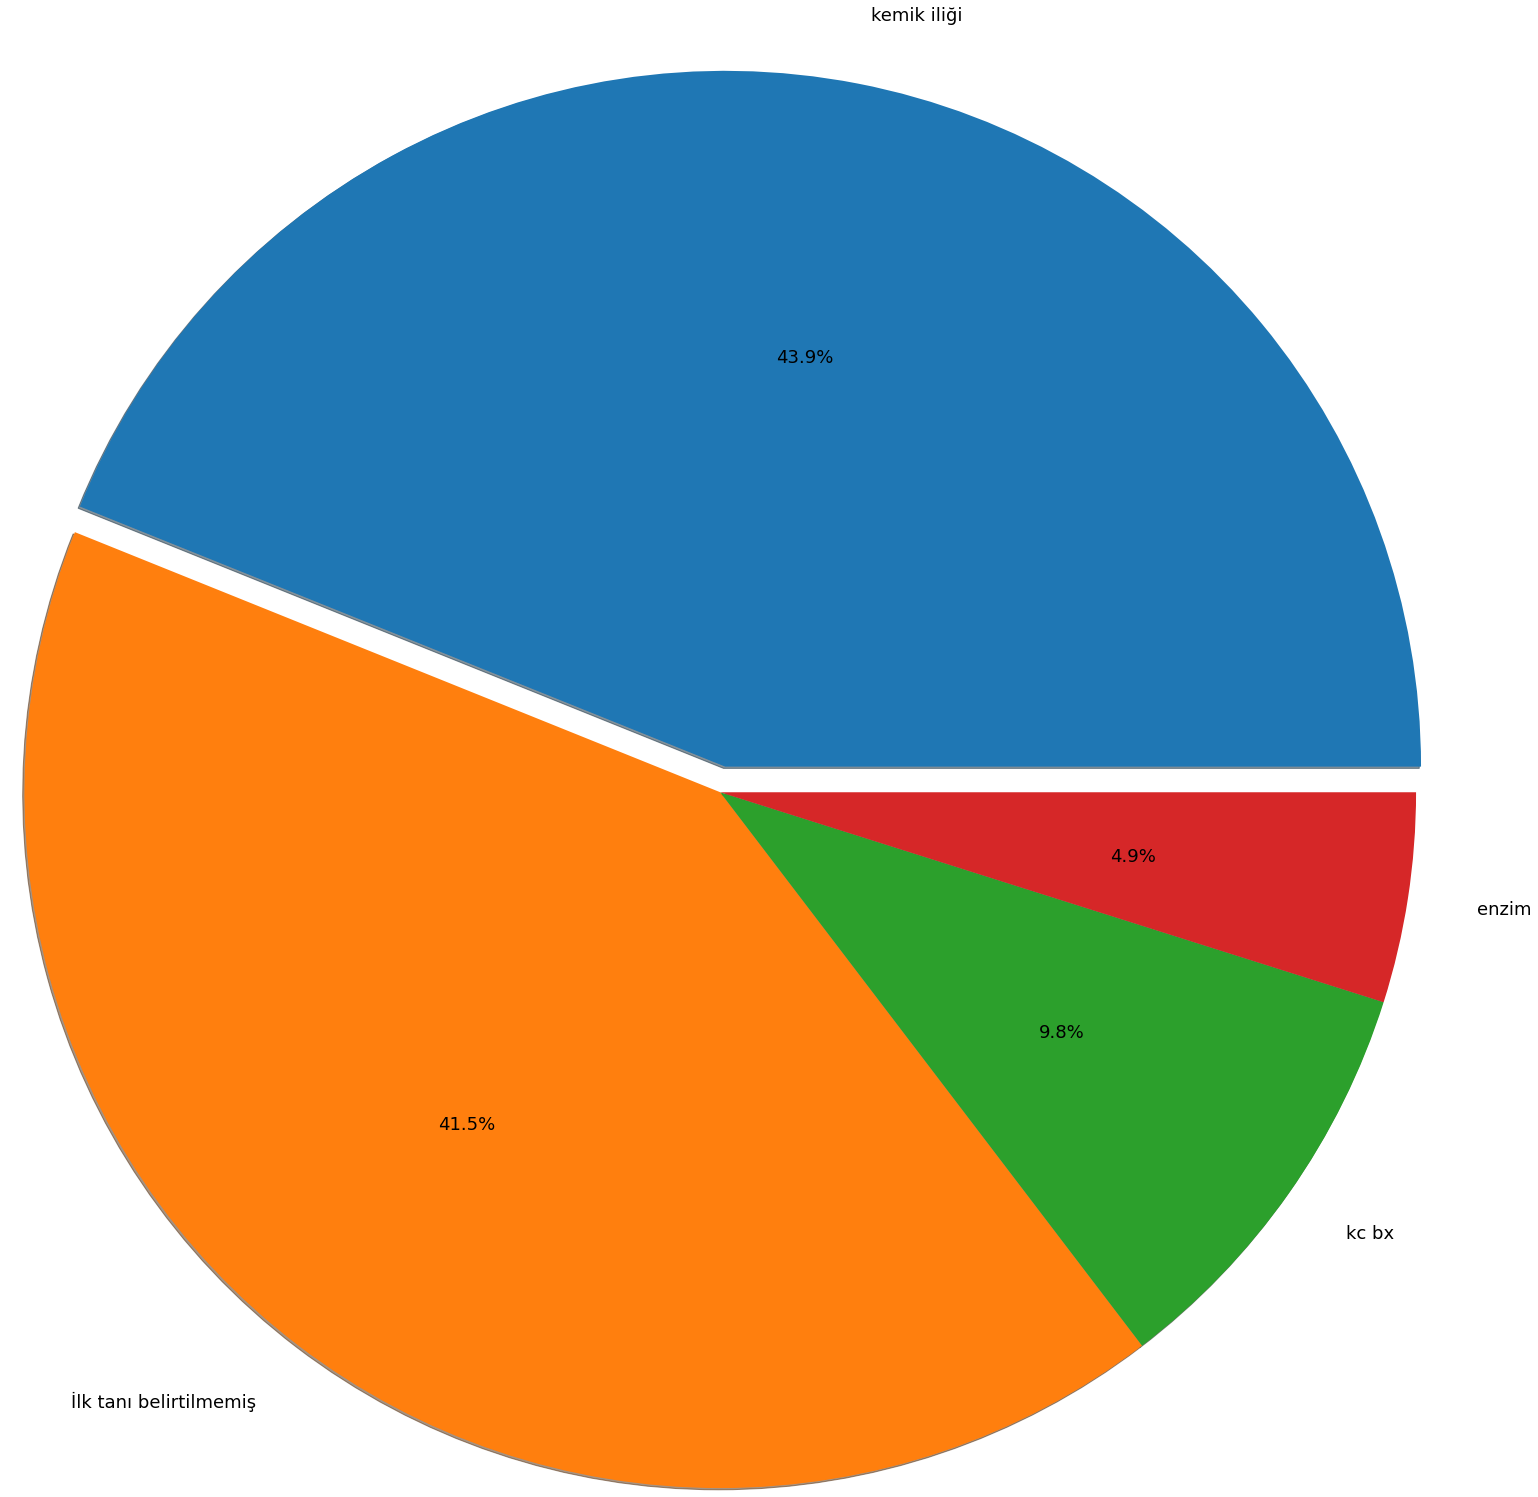

In [ ]:
explode = (0.3, 0, 0, 0)
plt.pie(ilktani_df[ilktani_df[0] > 1], 
        shadow=True,
        labels=ilktani_df[ilktani_df[0] > 1].index,
        radius=8,
        autopct='%1.1f%%',
        textprops={'fontsize': 18},
        explode=explode)
plt.show()

In [ ]:
data_selected['Unnamed: 1']

0     e
1     k
2     e
3     k
4     k
5     k
6     k
7     k
8     e
9     e
10    e
11    e
12    k
13    e
14    e
15    e
16    e
17    e
18    k
19    k
20    e
21    e
22    k
23    e
24    k
25    e
26    k
27    e
28    k
29    k
30    k
31    k
32    k
33    k
34    k
35    e
36    e
37    k
38    e
39    k
40    k
41    e
42    k
43    k
44    k
Name: Unnamed: 1, dtype: object

In [ ]:
data_selected.rename(columns = {'Unnamed: 1':'Cinsiyeti'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_selected.columns

Index(['dosya no', 'Cinsiyeti', 'dt', 'Yaşı (Ay)', 'Moleküler', 'Enzim',
       'İlk Semptom Yaşı (Ay)', 'ilk semptom', 'akrabalık', 'ilk tanısı',
       'Tanı', 'İlk HB Düzeyi', 'İlk Trombosit Düzeyi', 'İlk Lökosit Düzeyi',
       'İlk Karaciğer Büyüklüğü (cm)', 'İlk Dalak Büyüklüğü (cm)', 'ilk ert',
       'ek bulgu'],
      dtype='object')

In [ ]:
data_selected['akrabalık'].fillna('Akrabalık bağı belirtilmemiş', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_final = data_selected[['Cinsiyeti','Yaşı (Ay)', 'Moleküler','Enzim', 'Tanı',
       'İlk Semptom Yaşı (Ay)','akrabalık','İlk HB Düzeyi', 'İlk Trombosit Düzeyi', 'İlk Lökosit Düzeyi',
       'İlk Karaciğer Büyüklüğü (cm)', 'İlk Dalak Büyüklüğü (cm)']]

In [ ]:
data_final.dtypes

Cinsiyeti                        object
Yaşı (Ay)                        object
Moleküler                        object
Enzim                            object
Tanı                             object
İlk Semptom Yaşı (Ay)            object
akrabalık                        object
İlk HB Düzeyi                    object
İlk Trombosit Düzeyi            float64
İlk Lökosit Düzeyi              float64
İlk Karaciğer Büyüklüğü (cm)     object
İlk Dalak Büyüklüğü (cm)         object
dtype: object

In [ ]:
columns = data_final.columns

In [ ]:
for index, item in enumerate(columns):
  try:
    data_final[item] = data_final[item].astype(float)
  except ValueError:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_final

,Cinsiyeti,Yaşı (Ay),Moleküler,Enzim,Tanı,İlk Semptom Yaşı (Ay),akrabalık,İlk HB Düzeyi,İlk Trombosit Düzeyi,İlk Lökosit Düzeyi,İlk Karaciğer Büyüklüğü (cm),İlk Dalak Büyüklüğü (cm)
0,e,79.0,50000,2.87,g1,50000.0,var,9.7,185000.0,5100.0,115.40,122.400
1,k,50000.0,50000,0.27,g2,6.0,Akrabalık bağı belirtilmemiş,10.1,363000.0,15800.0,2.00,2.000
2,e,50000.0,50000,50000.00,g3,2.0,yok,50000.0,0.0,0.0,0.00,0.000
3,k,158.0,L444P/L444P,0.20,g3,24.0,var,8.1,61000.0,3700.0,157.15,170.000
4,k,117.0,c1226A>G/C1495G>A,0.26,g1,18.0,yok,11.2,59000.0,5700.0,135.00,12.170
5,k,121.0,c1448T^C homozigot,0.40,g3,6.0,var,7.8,122000.0,4700.0,3.92,0.158
6,k,144.0,50000,0.77,g1g3,50000.0,Akrabalık bağı belirtilmemiş,8.8,91000.0,3500.0,4.00,10.000
7,k,50000.0,50000,0.44,g1,444.0,yok,7.0,83000.0,3700.0,3.00,15.000
8,e,50000.0,50000,50000.00,g1,24.0,Akrabalık bağı belirtilmemiş,10.8,253000.0,8400.0,95.30,88.200
9,e,50000.0,50000,0.37,g1,50000.0,Akrabalık bağı belirtilmemiş,50000.0,0.0,0.0,0.00,0.000


In [ ]:
data_final.dtypes

Cinsiyeti                        object
Yaşı (Ay)                       float64
Moleküler                        object
Enzim                           float64
Tanı                             object
İlk Semptom Yaşı (Ay)           float64
akrabalık                        object
İlk HB Düzeyi                   float64
İlk Trombosit Düzeyi            float64
İlk Lökosit Düzeyi              float64
İlk Karaciğer Büyüklüğü (cm)    float64
İlk Dalak Büyüklüğü (cm)        float64
dtype: object

In [ ]:
float_columns = []
for index, item in enumerate(columns):
  if data_final[item].dtype == 'float64':
    float_columns.append(item)

In [ ]:
float_columns

['Yaşı (Ay)',
 'Enzim',
 'İlk Semptom Yaşı (Ay)',
 'İlk HB Düzeyi',
 'İlk Trombosit Düzeyi',
 'İlk Lökosit Düzeyi',
 'İlk Karaciğer Büyüklüğü (cm)',
 'İlk Dalak Büyüklüğü (cm)']

In [ ]:
for i in range(len(data_final)):
  for index, item in enumerate(columns):
    try:
      if data_final[item][i] == 50000 or data_final[item][i] == 0:
        data_final[item][i] = np.NaN
      else: 
        data_final[item][i] = data_final[item][i]
    except ValueError:
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data_to_imput = data_final.copy()

In [ ]:
for i in range(len(data_to_imput)):
  for index, item in enumerate(float_columns):
    try:
      data_to_imput[item].fillna(data_to_imput[item].median(), inplace=True)
    except ValueError:      
      pass

In [ ]:
df_floats_final = data_to_imput[float_columns]

# DESCRIPTIVE ANALYSIS

In [ ]:
df_floats_final.describe()

,Yaşı (Ay),Enzim,İlk Semptom Yaşı (Ay),İlk HB Düzeyi,İlk Trombosit Düzeyi,İlk Lökosit Düzeyi,İlk Karaciğer Büyüklüğü (cm),İlk Dalak Büyüklüğü (cm)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,85.400000,2.212667,40.511111,8.940000,125293.333333,7533.777778,74.593111,91.778178
std,49.030325,9.051087,76.964756,1.739828,81556.180859,7136.447833,54.142955,57.739298
min,5.000000,0.200000,2.000000,5.500000,7000.000000,2500.000000,1.000000,0.158000
25%,80.000000,0.440000,12.000000,7.900000,71000.000000,5000.000000,7.000000,15.000000
50%,80.000000,0.500000,19.000000,9.000000,101000.000000,5700.000000,95.300000,110.500000
75%,80.000000,0.660000,24.000000,10.200000,158000.000000,8100.000000,111.500000,130.600000
max,237.000000,61.000000,444.000000,12.000000,363000.000000,50900.000000,157.150000,185.150000


In [ ]:
data_final['index_col'] = data_final.index
df_floats_final['index_col']= df_floats_final.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df = pd.merge(df_floats_final,data_final[['index_col','akrabalık','Cinsiyeti', 'Tanı']],on='index_col', how='left')

In [ ]:
df.drop('index_col', axis=1, inplace=True)

In [ ]:
df

,Yaşı (Ay),Enzim,İlk Semptom Yaşı (Ay),İlk HB Düzeyi,İlk Trombosit Düzeyi,İlk Lökosit Düzeyi,İlk Karaciğer Büyüklüğü (cm),İlk Dalak Büyüklüğü (cm),akrabalık,Cinsiyeti,Tanı
0,79.0,2.87,19.0,9.7,185000.0,5100.0,115.40,122.400,var,e,g1
1,80.0,0.27,6.0,10.1,363000.0,15800.0,2.00,2.000,Akrabalık bağı belirtilmemiş,k,g2
2,80.0,0.50,2.0,9.0,101000.0,5700.0,95.30,110.500,yok,e,g3
3,158.0,0.20,24.0,8.1,61000.0,3700.0,157.15,170.000,var,k,g3
4,117.0,0.26,18.0,11.2,59000.0,5700.0,135.00,12.170,yok,k,g1
5,121.0,0.40,6.0,7.8,122000.0,4700.0,3.92,0.158,var,k,g3
6,144.0,0.77,19.0,8.8,91000.0,3500.0,4.00,10.000,Akrabalık bağı belirtilmemiş,k,g1g3
7,80.0,0.44,444.0,7.0,83000.0,3700.0,3.00,15.000,yok,k,g1
8,80.0,0.50,24.0,10.8,253000.0,8400.0,95.30,88.200,Akrabalık bağı belirtilmemiş,e,g1
9,80.0,0.37,19.0,9.0,101000.0,5700.0,95.30,110.500,Akrabalık bağı belirtilmemiş,e,g1


In [ ]:
df.describe()

,Yaşı (Ay),Enzim,İlk Semptom Yaşı (Ay),İlk HB Düzeyi,İlk Trombosit Düzeyi,İlk Lökosit Düzeyi,İlk Karaciğer Büyüklüğü (cm),İlk Dalak Büyüklüğü (cm)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,85.400000,2.212667,40.511111,8.940000,125293.333333,7533.777778,74.593111,91.778178
std,49.030325,9.051087,76.964756,1.739828,81556.180859,7136.447833,54.142955,57.739298
min,5.000000,0.200000,2.000000,5.500000,7000.000000,2500.000000,1.000000,0.158000
25%,80.000000,0.440000,12.000000,7.900000,71000.000000,5000.000000,7.000000,15.000000
50%,80.000000,0.500000,19.000000,9.000000,101000.000000,5700.000000,95.300000,110.500000
75%,80.000000,0.660000,24.000000,10.200000,158000.000000,8100.000000,111.500000,130.600000
max,237.000000,61.000000,444.000000,12.000000,363000.000000,50900.000000,157.150000,185.150000


In [ ]:
##Dalak büyüklüğü min değerinde bir sıkıntı olduğunu fark ettim, verinin ilk haline baktığımda sebebin verinin tutulma şekli olduğunu gördüm.

In [ ]:
df['İlk Dalak Büyüklüğü (cm)'][5] = np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['İlk Dalak Büyüklüğü (cm)'][5]

nan

In [ ]:
df['İlk Dalak Büyüklüğü (cm)'].fillna(df['İlk Dalak Büyüklüğü (cm)'].median(), inplace=True)

In [ ]:
df['İlk Dalak Büyüklüğü (cm)'][5]

110.5

In [ ]:
df.describe()

,Yaşı (Ay),Enzim,İlk Semptom Yaşı (Ay),İlk HB Düzeyi,İlk Trombosit Düzeyi,İlk Lökosit Düzeyi,İlk Karaciğer Büyüklüğü (cm),İlk Dalak Büyüklüğü (cm)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,85.400000,2.212667,40.511111,8.940000,125293.333333,7533.777778,74.593111,94.230222
std,49.030325,9.051087,76.964756,1.739828,81556.180859,7136.447833,54.142955,56.079095
min,5.000000,0.200000,2.000000,5.500000,7000.000000,2500.000000,1.000000,2.000000
25%,80.000000,0.440000,12.000000,7.900000,71000.000000,5000.000000,7.000000,20.000000
50%,80.000000,0.500000,19.000000,9.000000,101000.000000,5700.000000,95.300000,110.500000
75%,80.000000,0.660000,24.000000,10.200000,158000.000000,8100.000000,111.500000,130.600000
max,237.000000,61.000000,444.000000,12.000000,363000.000000,50900.000000,157.150000,185.150000


### Yaş ve Cinsiyete Bağlı Analizler

In [ ]:
age = pd.cut(df['Yaşı (Ay)'], [0, 72, 120, df['Yaşı (Ay)'].max()])

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk HB Düzeyi'].describe()

count       mean       std  ...    50%     75%   max
Cinsiyeti Yaşı (Ay)                                   ...                     
e         (0.0, 72.0]       5.0   8.280000  1.564289  ...   8.00   9.300  10.2
          (72.0, 120.0]    11.0   9.509091  0.978217  ...   9.30  10.300  10.8
          (120.0, 237.0]    4.0  10.575000  1.755705  ...  11.05  11.850  12.0
k         (0.0, 72.0]       4.0   9.175000  2.140677  ...   8.85  10.325  11.9
          (72.0, 120.0]    16.0   8.325000  2.034207  ...   9.00   9.275  11.7
          (120.0, 237.0]    5.0   8.820000  1.223520  ...   8.50   8.800  10.9

[6 rows x 8 columns]

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk HB Düzeyi'].aggregate('mean').unstack()

Yaşı (Ay),"(0.0, 72.0]","(72.0, 120.0]","(120.0, 237.0]"
Cinsiyeti,,,
e,8.280,9.509091,10.575
k,9.175,8.325000,8.820


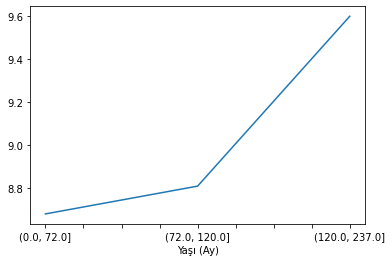

In [ ]:
df.groupby(age)['İlk HB Düzeyi'].aggregate('mean').plot()

In [ ]:
df.groupby(['Cinsiyeti', age])['Enzim'].describe()

count      mean        std  ...   50%     75%    max
Cinsiyeti Yaşı (Ay)                                   ...                     
e         (0.0, 72.0]       5.0  0.664000   0.299383  ...  0.50  0.6300   1.19
          (72.0, 120.0]    11.0  1.426364   2.278172  ...  0.50  1.0300   7.90
          (120.0, 237.0]    4.0  0.640000   0.634613  ...  0.34  0.6825   1.59
k         (0.0, 72.0]       4.0  0.450000   0.100000  ...  0.50  0.5000   0.50
          (72.0, 120.0]    16.0  4.591875  15.066991  ...  0.50  0.6600  61.00
          (120.0, 237.0]    5.0  0.546000   0.270148  ...  0.50  0.7700   0.86

[6 rows x 8 columns]

Yaşı (Ay)
(0.0, 72.0]       AxesSubplot(0.125,0.125;0.775x0.755)
(72.0, 120.0]     AxesSubplot(0.125,0.125;0.775x0.755)
(120.0, 237.0]    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Enzim, dtype: object

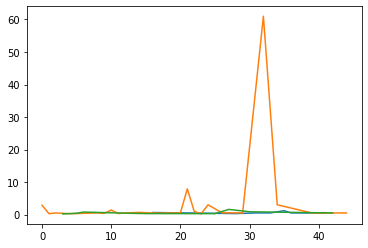

In [ ]:
df.groupby(age)['Enzim'].plot()

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk Trombosit Düzeyi'].describe()

count           mean  ...       75%       max
Cinsiyeti Yaşı (Ay)                             ...                    
e         (0.0, 72.0]       5.0  153100.000000  ...  180000.0  286500.0
          (72.0, 120.0]    11.0  111181.818182  ...  155500.0  253000.0
          (120.0, 237.0]    4.0  110000.000000  ...  138250.0  202000.0
k         (0.0, 72.0]       4.0  147250.000000  ...  194000.0  302000.0
          (72.0, 120.0]    16.0  132356.250000  ...  149500.0  363000.0
          (120.0, 237.0]    5.0  100600.000000  ...  122000.0  127000.0

[6 rows x 8 columns]

Yaşı (Ay)
(0.0, 72.0]       AxesSubplot(0.125,0.125;0.775x0.755)
(72.0, 120.0]     AxesSubplot(0.125,0.125;0.775x0.755)
(120.0, 237.0]    AxesSubplot(0.125,0.125;0.775x0.755)
Name: İlk Trombosit Düzeyi, dtype: object

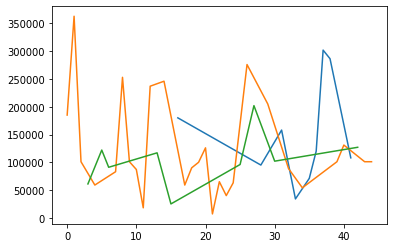

In [ ]:
df.groupby(age)['İlk Trombosit Düzeyi'].plot()

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk Lökosit Düzeyi'].describe()

count          mean  ...     75%      max
Cinsiyeti Yaşı (Ay)                            ...                 
e         (0.0, 72.0]       5.0   6844.000000  ...  9000.0   9900.0
          (72.0, 120.0]    11.0  10745.454545  ...  9450.0  50900.0
          (120.0, 237.0]    4.0   4950.000000  ...  5450.0   6800.0
k         (0.0, 72.0]       4.0   7347.500000  ...  8322.5  11390.0
          (72.0, 120.0]    16.0   7082.500000  ...  7925.0  15800.0
          (120.0, 237.0]    5.0   4818.000000  ...  5300.0   6890.0

[6 rows x 8 columns]

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk Karaciğer Büyüklüğü (cm)'].describe()

count        mean        std  ...     50%      75%     max
Cinsiyeti Yaşı (Ay)                                     ...                         
e         (0.0, 72.0]       5.0   28.880000  56.797641  ...    4.00    7.000  130.40
          (72.0, 120.0]    11.0   92.109091  42.667188  ...   99.50  111.700  152.70
          (120.0, 237.0]    4.0  124.925000  23.346716  ...  126.85  137.725  150.70
k         (0.0, 72.0]       4.0   98.225000   5.850000  ...   95.30   98.225  107.00
          (72.0, 120.0]    16.0   60.813750  51.505371  ...   87.90   98.625  135.00
          (120.0, 237.0]    5.0   66.694000  81.861469  ...   13.00  155.400  157.15

[6 rows x 8 columns]

In [ ]:
##Burada bir hata olduğunu fark ettim.

In [ ]:
df.groupby(['Cinsiyeti', age])['İlk Dalak Büyüklüğü (cm)'].describe()

count        mean        std  ...     50%      75%     max
Cinsiyeti Yaşı (Ay)                                     ...                         
e         (0.0, 72.0]       5.0   54.322000  68.194105  ...   10.00  110.500  145.00
          (72.0, 120.0]    11.0  111.136364  39.097066  ...  118.00  126.500  152.10
          (120.0, 237.0]    4.0  139.030000  26.481886  ...  137.75  155.330  170.12
k         (0.0, 72.0]       4.0  118.250000  17.909495  ...  110.50  119.125  145.00
          (72.0, 120.0]    16.0   78.489375  60.112135  ...  110.50  110.500  185.15
          (120.0, 237.0]    5.0   92.260000  73.809471  ...  110.50  150.800  170.00

[6 rows x 8 columns]

### Akrabalık ve Cinsiyete Bağlı Analizler

In [ ]:
df.pivot_table('İlk HB Düzeyi',index='Cinsiyeti',columns='akrabalık', margins=True, aggfunc=['count', 'mean'])

count          ...      mean                
akrabalık Akrabalık bağı belirtilmemiş var yok  ...       var      yok    All
Cinsiyeti                                       ...                          
e                                    4   8   8  ...  8.750000  9.98750  9.415
k                                    5  12   8  ...  7.966667  9.35000  8.560
All                                  9  20  16  ...  8.280000  9.66875  8.940

[3 rows x 8 columns]

In [ ]:
df.pivot_table('İlk Semptom Yaşı (Ay)',index='Cinsiyeti',columns='akrabalık', margins=True, aggfunc=['count', 'mean'])

count          ...       mean                  
akrabalık Akrabalık bağı belirtilmemiş var yok  ...        var    yok        All
Cinsiyeti                                       ...                             
e                                    4   8   8  ...  27.250000  17.50  21.950000
k                                    5  12   8  ...  34.083333  83.00  55.360000
All                                  9  20  16  ...  31.350000  50.25  40.511111

[3 rows x 8 columns]

In [ ]:
df.pivot_table('İlk Trombosit Düzeyi',index='Cinsiyeti',columns='akrabalık', margins=True, aggfunc=['count', 'mean'])

count      ...       mean               
akrabalık Akrabalık bağı belirtilmemiş var  ...        yok            All
Cinsiyeti                                   ...                          
e                                    4   8  ...  124562.50  121425.000000
k                                    5  12  ...  121125.00  128388.000000
All                                  9  20  ...  122843.75  125293.333333

[3 rows x 8 columns]

In [ ]:
df.pivot_table('İlk Lökosit Düzeyi',index='Cinsiyeti',columns='akrabalık', margins=True, aggfunc=['count', 'mean'])

count      ...     mean             
akrabalık Akrabalık bağı belirtilmemiş var  ...      yok          All
Cinsiyeti                                   ...                      
e                                    4   8  ...  5826.25  8611.000000
k                                    5  12  ...  5978.75  6672.000000
All                                  9  20  ...  5902.50  7533.777778

[3 rows x 8 columns]

In [ ]:
df.pivot_table('Enzim',index='Cinsiyeti',columns='akrabalık', margins=True, aggfunc=['count', 'mean'])

count          ...      mean                   
akrabalık Akrabalık bağı belirtilmemiş var yok  ...       var      yok       All
Cinsiyeti                                       ...                             
e                                    4   8   8  ...  0.812500  0.70500  1.078500
k                                    5  12   8  ...  5.734167  0.45750  3.120000
All                                  9  20  16  ...  3.765500  0.58125  2.212667

[3 rows x 8 columns]

In [ ]:
df.groupby(['Tanı', 'Cinsiyeti'])['akrabalık'].aggregate('count').unstack()

Cinsiyeti,e,k
Tanı,,
g1,11,10
g1g3,1,1
g2,2,3
g3,6,11
